**Importing Required Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.utils import to_categorical
from keras.models import load_model

**Read Data and Pre Processing**

In [4]:
#Reading the dataset
df = pd.read_csv(r'spam.csv',delimiter=',',encoding = 'latin-1')


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#Dropping Unnecessary Columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.groupby(['v1']).size()

v1
ham     4825
spam     747
dtype: int64

In [8]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [9]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

**Training and Testing Data Split**

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [11]:
max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
sequences_matrix

array([[  0,   0,   0, ..., 555, 237, 221],
       [  0,   0,   0, ...,  78, 107, 504],
       [  0,   0,   0, ...,  33,   3, 413],
       ...,
       [  0,   0,   0, ...,   3,  40, 121],
       [  0,   0,   0, ...,  13,  59,  14],
       [  0,   0,   0, ..., 107,   8, 408]], dtype=int32)

**Creating LSTM model**

In [13]:
inputs = Input(name='InputLayer',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FullyConnectedLayer1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='OutputLayer')(layer)
layer = Activation('sigmoid')(layer)

**Compile The Model**

In [14]:
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FullyConnectedLayer1 (Dense  (None, 256)              16640     
 )                                                               
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

**Fit The Model**

In [15]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 12s 306ms/step - loss: 0.3443 - accuracy: 0.8699 - val_loss: 0.1640 - val_accuracy: 0.9378
Epoch 2/10
30/30 [==============================] - 8s 283ms/step - loss: 0.0956 - accuracy: 0.9760 - val_loss: 0.0636 - val_accuracy: 0.9831
Epoch 3/10
30/30 [==============================] - 8s 255ms/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.0612 - val_accuracy: 0.9831
Epoch 4/10
30/30 [==============================] - 9s 289ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0626 - val_accuracy: 0.9842
Epoch 5/10
30/30 [==============================] - 8s 268ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 6/10
30/30 [==============================] - 7s 245ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0675 - val_accuracy: 0.9810
Epoch 7/10
30/30 [==============================] - 13s 426ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0746 - val_accuracy: 0.9852
Epoc

**Save The Model**

In [16]:
model.save('spam_model')

**Test The Model**

In [17]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix  = sequence.pad_sequences(test_sequences,maxlen=max_len)
accuracy = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy: {:0.3f}'.format(accuracy[1]))

27/27 [==============================] - 1s 21ms/step - loss: 0.0476 - accuracy: 0.9904
Accuracy: 0.990


In [18]:
y_pred = model.predict(test_sequences_matrix)
pred = y_pred[25:40].round(3)
test =Y_test[25:40]

27/27 [==============================] - 1s 20ms/step


In [19]:
print(pred)
print(test)

[[0.   ]
 [0.007]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [1.   ]]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


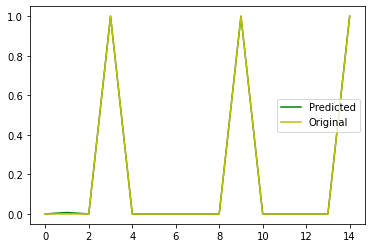

In [20]:
plt.plot(pred[:],color='g', label='Predicted')
plt.plot(test[:],color='y', label='Original')
plt.legend()
plt.show()